<a href="https://colab.research.google.com/github/GuilhermeFogolin/Python-Dados-Machine-Learning/blob/main/Tratamento_Projeto03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 03: COVID-19 mundial**

Este projeto analisa e implementa um algoritmo de Machine Learning para análise e previsão da evolução do COVID-19 no período de 24/02/2019 a 05/09/2019.

Os dados foram retirados em 04/09/2020 da Organização Mundial da Saúde:

(https://covid19.who.int/table)

## **ANÁLISE E EXPLORAÇÃO DOS DADOS**

In [4]:
import numpy as np
import pandas as pd

In [5]:
covidmundial = pd.read_csv('/content/drive/MyDrive/Python_Dados_Machine_Learning/covid19_mundial.csv', sep=',')

In [6]:
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [7]:
# Número de mortes acumuladas por país
totaldeaths = covidmundial.groupby('country').cumulative_deaths.max()

In [8]:
# Organização em ordem decrescente
totaldeaths.sort_values(ascending=False).head(15)

,cumulative_deaths
country,
United States of America,184614
Brazil,123780
India,68472
Mexico,65816
The United Kingdom,41527
Italy,35507
France,30556
Peru,29259
Spain,29234


In [9]:
# Casos acumulados por país
casos_total = covidmundial.groupby('country').cumulative_cases.max()

In [10]:
# Organização em ordem decrescente dos casos acumulados
casos_total.sort_values(ascending=False).head(20)

,cumulative_cases
country,
United States of America,6050444
Brazil,3997865
India,3936747
Russian Federation,1015105
Peru,663437
Colombia,633339
South Africa,633015
Mexico,610957
Spain,488513


In [11]:
covidbrasil = covidmundial.loc[covidmundial.country=='Brazil']

In [12]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [13]:
covidbrasil.shape

(192, 8)

In [14]:
# Análise dos tipos de variáveis
covidbrasil.dtypes

,0
date,object
country_code,object
country,object
who_region,object
new_cases,int64
cumulative_cases,int64
new_deaths,int64
cumulative_deaths,int64


In [15]:
# Análise de valores missing para o Brasil
covidbrasil.isnull().sum()

,0
date,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [16]:
# Análise de valores missing mundialmente
covidmundial.isnull().sum()

,0
date,0
country_code,175
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


**Análise de Valores Negativos**

In [17]:
covidmundial.loc[covidmundial.new_cases < 0, :]

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
25,2020-03-20,AF,Afghanistan,EMRO,-2,24,0,0
1095,2020-03-24,AG,Antigua and Barbuda,AMRO,-2,3,0,0
1636,2020-03-19,AW,Aruba,AMRO,-3,5,0,0
2414,2020-03-20,BS,Bahamas,AMRO,-3,4,0,0
2960,2020-03-20,BB,Barbados,AMRO,-1,5,0,0
...,...,...,...,...,...,...,...,...
36347,2020-03-19,TT,Trinidad and Tobago,AMRO,-2,9,0,0
37112,2020-05-25,UG,Uganda,AFRO,-8,304,0,0
37140,2020-06-22,UG,Uganda,AFRO,-68,755,0,0
38030,2020-03-21,VI,United States Virgin Islands,AMRO,-1,6,0,0


In [18]:
covidmundial.loc[covidmundial.new_cases < 0, :].count()

,0
date,82
country_code,81
country,82
who_region,82
new_cases,82
cumulative_cases,82
new_deaths,82
cumulative_deaths,82


In [19]:
covidmundial.loc[covidmundial.new_deaths < 0, :].count()

,0
date,28
country_code,28
country,28
who_region,28
new_cases,28
cumulative_cases,28
new_deaths,28
cumulative_deaths,28


In [20]:
covidbrasil.loc[covidbrasil.new_cases < 0, :].count()

,0
date,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [21]:
covidbrasil.loc[covidbrasil.new_deaths < 0, :].count()

,0
date,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [22]:
# Criação de um dataframe com a soma de todos os países por data
covidmundial_sum = covidmundial.groupby('date').agg({'new_cases': 'sum','cumulative_cases':'sum','new_deaths': 'sum','cumulative_deaths':'sum'}).reset_index()

In [23]:
covidmundial_sum

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-01-04,1,1,0,0
1,2020-01-05,0,1,0,0
2,2020-01-06,3,4,0,0
3,2020-01-07,0,4,0,0
4,2020-01-08,0,4,0,0
...,...,...,...,...,...
240,2020-08-31,267850,25144425,5417,844473
241,2020-09-01,212698,25357123,3980,848453
242,2020-09-02,248989,25606112,4370,852823
243,2020-09-03,279613,25885725,6317,859140


## **ANÁLISES ESTATÍSTICAS**

In [24]:
covidbrasil.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192.000000,1.920000e+02,192.000000,192.000000
mean,20822.213542,1.097211e+06,644.687500,41098.796875
std,19158.201448,1.268914e+06,482.608603,41370.781794
min,0.000000,5.000000e+00,0.000000,0.000000
25%,1819.250000,2.180850e+04,114.750000,1198.250000
50%,17259.000000,4.818030e+05,631.500000,28356.000000
75%,38775.500000,2.020695e+06,1112.750000,76978.750000
max,69074.000000,3.997865e+06,1595.000000,123780.000000


In [25]:
covidbrasil.new_cases.mode()

,new_cases
0,0


In [26]:
covidbrasil.new_deaths.mode()

,new_deaths
0,0


**Análise dos Outliers**

In [27]:
import plotly.express as px

In [28]:
px.box(covidbrasil, y='cumulative_cases')

In [29]:
px.box(covidbrasil, y='cumulative_deaths')

**Análise da Normalidade**

In [30]:
import seaborn as sns

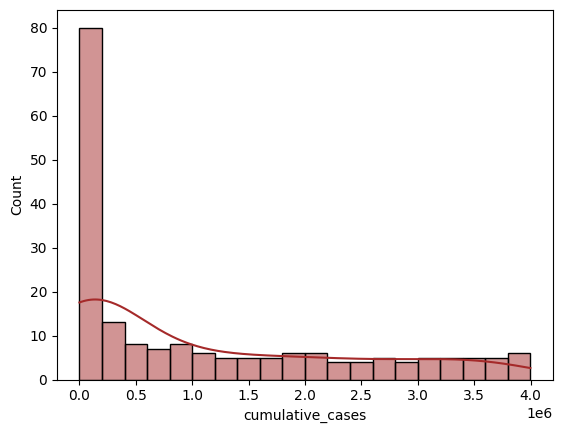

In [31]:
sns.histplot(covidbrasil, x='cumulative_cases', bins=20, color="brown", kde=True, stat="count");

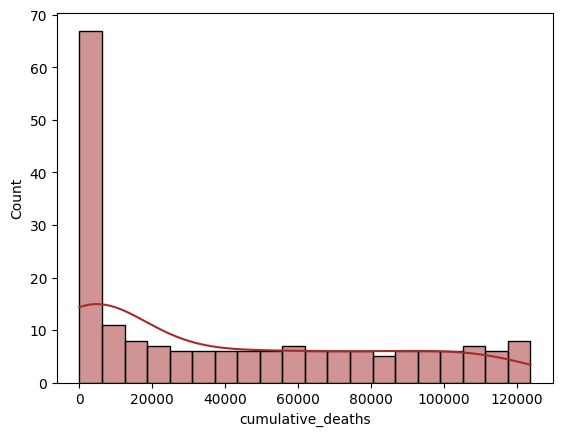

In [32]:
sns.histplot(covidbrasil, x='cumulative_deaths', bins=20, color="brown", kde=True, stat="count",);

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

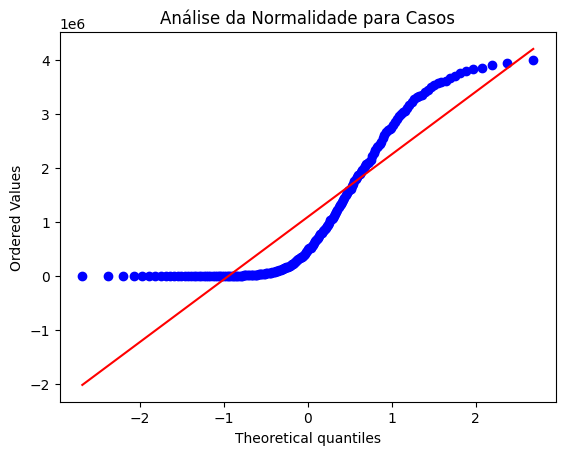

In [34]:
stats.probplot(covidbrasil['cumulative_cases'], dist="norm", plot=plt)
plt.title("Análise da Normalidade para Casos")
plt.show()

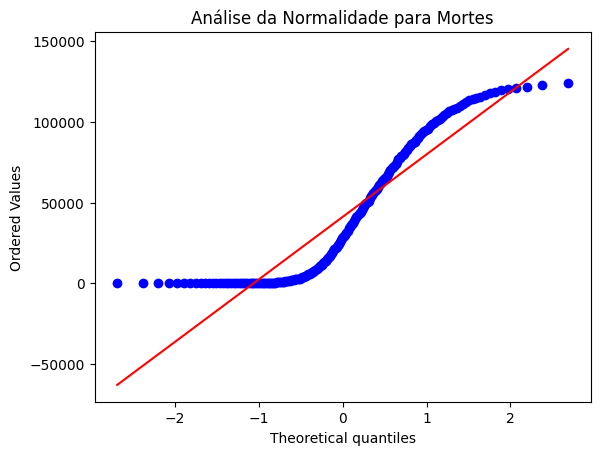

In [35]:
stats.probplot(covidbrasil['cumulative_deaths'], dist="norm", plot=plt)
plt.title("Análise da Normalidade para Mortes")
plt.show()

In [36]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [37]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covidbrasil.cumulative_cases, dist = 'norm',)
print ('Estatística do teste (D) =', round(estatistica,2))
print ('p_valor =', p)

Estatística do teste (D) = 0.2
p_valor = 0.0009999999999998899


In [38]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covidbrasil.cumulative_deaths, dist = 'norm',)
print ('Estatística do teste (D) =', round(estatistica,2))
print ('p_valor =', p)

Estatística do teste (D) = 0.17
p_valor = 0.0009999999999998899


**Gráfico de dispersão em função das datas**

In [39]:
import plotly.express as px

In [40]:
disp = px.scatter(x=covidbrasil.date, y=covidbrasil.cumulative_cases)
disp.update_layout(width=900,height=400,title_text='Número de casos acumulados no Brasil')
disp.update_xaxes(title = 'Datas')
disp.update_yaxes(title = 'Casos')
disp.show()

In [41]:
disp = px.scatter(x=covidbrasil.date, y=covidbrasil.cumulative_deaths)
disp.update_layout(width=900,height=400,title_text='Número de mortes acumulados no Brasil')
disp.update_xaxes(title = 'Datas')
disp.update_yaxes(title = 'Mortes')
disp.show()

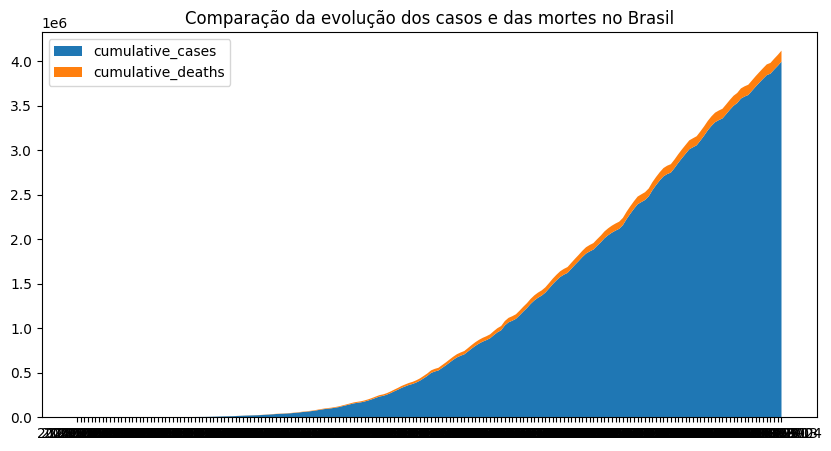

In [42]:
plt.subplots(figsize=(10,5))
plt.stackplot(covidbrasil['date'], [covidbrasil['cumulative_cases'], covidbrasil['cumulative_deaths']],
              labels = ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc = 'upper left')
plt.title('Comparação da evolução dos casos e das mortes no Brasil');

**Correlação Linear**

In [43]:
# Excluir colunas não numéricas antes de calcular a correlação
correlacoes = covidbrasil.select_dtypes(include=np.number).corr(method='spearman')

In [44]:
correlacoes

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.910545,0.916165,0.910210
cumulative_cases,0.910545,1.000000,0.784347,0.999354
new_deaths,0.916165,0.784347,1.000000,0.784867
cumulative_deaths,0.910210,0.999354,0.784867,1.000000


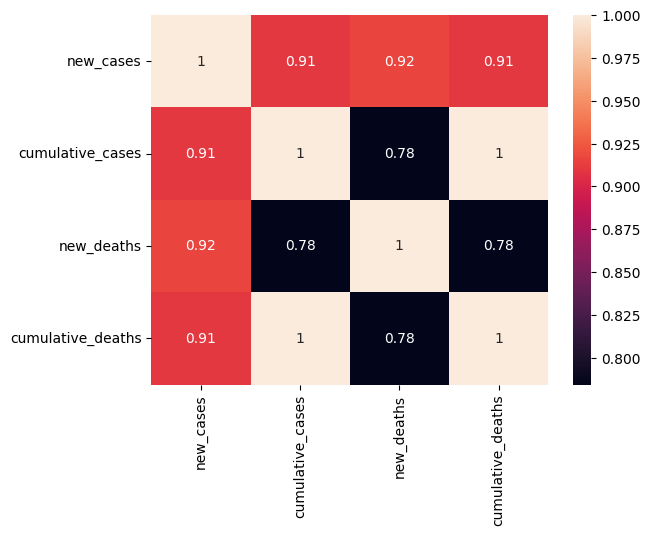

In [45]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **MACHINE LEARNING**

### **Regressão Linear Simples**

In [46]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [47]:
covidbrasil.shape

(192, 8)

In [48]:
import plotly.express as px

In [49]:
disp = px.scatter(x=covidbrasil.new_cases, y=covidbrasil.new_deaths)
disp.update_layout(width=900,height=400,title_text='Número de mortes em função do número de casos')
disp.update_xaxes(title = 'Novos casos')
disp.update_yaxes(title = 'Novas mortes')
disp.show()

In [50]:
x = covidbrasil.iloc[:, 4].values
y = covidbrasil.iloc[:, 6].values

In [51]:
x

array([    5,     0,     0,     0,     1,     0,     0,     1,     4,
           1,    11,     0,     6,     0,     9,    18,    46,    23,
           0,    79,    34,    57,   133,   193,   283,     0,     0,
        1297,     0,   232,     0,   482,   502,   487,   352,   323,
        1138,  1119,  1074,  1146,  1222,   852,   926,  1661,  2210,
        1930,  1781,  1089,  1442,  1261,  1832,  3058,  2105,  3257,
        2917,  2055,  1927,  2498,  2678,  3735,  3503,  5514,  3379,
        4613,  5385,  6276,  7218,  6209,  4970,  4588,  6633,  6935,
       10503,  9888, 10222, 10611,  6760,  5632,  9258, 11385, 13944,
       15305, 14919,  7938, 13140, 17408, 19951, 18508, 20803, 16508,
       15813, 11687, 16324, 20599, 26417, 26928, 33274, 16409, 11598,
       28936, 28633, 30925, 30830, 27075, 18912, 15654, 32091, 32913,
       30412, 25982, 21704, 17110, 20647, 34918, 32188, 22765, 54771,
       34666, 17459, 21432, 39436, 42725, 39483, 46860, 38693, 30476,
       24052, 33846,

In [52]:
y

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          3,    0,    7,    0,    0,   35,    0,   11,    0,   20,   15,
         22,   22,   23,   42,   40,   58,   60,   73,   54,   67,  114,
        133,  141,  115,   68,   99,  105,  204,  204,  188,  217,  206,
        115,  113,  166,  165,  407,  357,  346,  189,  338,  474,  449,
        435,  428,  421,  275,  296,  600,  615,  610,  751,  730,  496,
        396,  881,  749,  844,  824,  816,  485,  674, 1179,  888, 1188,
       1001,  965,  653,  807, 1039, 1086, 1156, 1124,  956,  480,  623,
       1262, 1349, 1473, 1005,  904,  525,  679, 1272, 1274, 1239,  909,
        892,  612,  627, 1282, 1269, 1238, 1206, 1022,  641,  654, 1374,
       1185, 1141,  990, 1109,  552,  692, 1280, 1038, 1252, 1290, 1091,
        602,  620, 1254, 1223, 1220, 1214, 1071,  631,  733, 1300, 1233,
       1322, 1163,  921,  716,  632, 1367, 1284, 13

In [53]:
# Transformando em matriz
x = x.reshape(-1,1)

In [ ]:
x

**Separando base de dados em teste e treinamento**

In [55]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size = 0.25,
                                                                  random_state = 2)

In [ ]:
x_treinamento

In [ ]:
x_teste

In [ ]:
y_treinamento

In [ ]:
y_teste

In [63]:
x_treinamento.size

144

In [64]:
x_teste.size

48

In [65]:
y_treinamento.size

144

In [66]:
y_teste.size

48

**Criação do modelo de regressão linear**

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

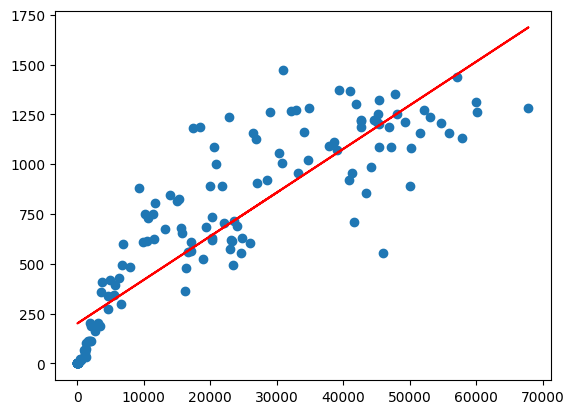

In [68]:
# Gráfico com dados de treinamento
import matplotlib.pyplot as plt
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'red');

In [69]:
score

0.7706687225813502

In [70]:
previsoes = regressor.predict(x_teste)

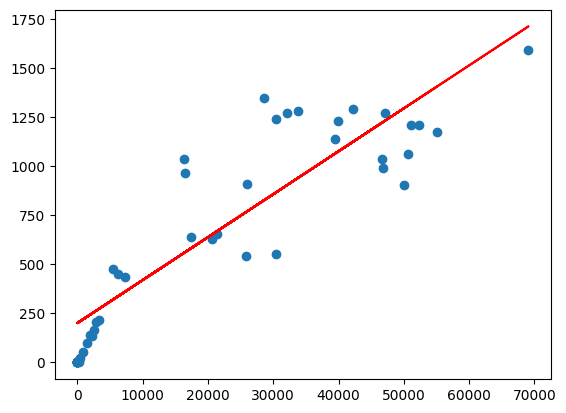

In [71]:
# Gráfico com os dados de teste
plt.scatter(x_teste, y_teste)
plt.plot(x_teste, regressor.predict(x_teste), color = 'red');

In [72]:
previsao = regressor.predict(np.array(80000).reshape(1, -1))
previsao

array([1951.4593068])

In [73]:
# Coeficiente linear
regressor.intercept_

np.float64(201.0394388596036)

In [74]:
# Coeficiente angular
regressor.coef_

array([0.02188025])

Equação: mortes = 201,03944 + 0,02188*casos

**Métricas de Desempenho**

In [75]:
# Coeficiente de determinação (R^2)
regressor.score(x_teste, y_teste)

0.8194463380519905

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
print('Erro Médio Absoluto (MAE):', mean_absolute_error(y_teste, previsoes))
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_teste, previsoes))
print('Raiz do Erro Quadrático Médio (RMSE):', np.sqrt(mean_squared_error(y_teste, previsoes)))

Erro Médio Absoluto (MAE): 192.0478857729403
Erro Quadrático Médio (MSE): 49488.28727462369
Raiz do Erro Quadrático Médio (RMSE): 222.4596306627872


### **Regressão Polinomial**

In [109]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [112]:
disp = px.scatter(x=covidbrasil.date, y=covidbrasil.cumulative_cases)
disp.update_layout(width=900,height=400,title_text='Número de casos acuumulados no Brasil')
disp.update_xaxes(title = 'Datas')
disp.update_yaxes(title = 'Casos')
disp.show()

In [110]:
x = covidbrasil.iloc[:, 0].values

In [ ]:
x

In [ ]:
# Transformar as datas em sequência numérica (1,2,3,4...) e em matriz
x = np.arange(1,len(x)+1).reshape(-1,1)
x

In [ ]:
y = covidbrasil.iloc[:, 5].values
y

**Separando base de dados em teste e treinamento**

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [116]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,test_size = 0.25, random_state = 2)

In [117]:
x_treinamento.size

144

In [118]:
x_teste.size

48

In [119]:
y_treinamento.size

144

In [120]:
y_teste.size

48

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)

In [124]:
previsoes = regressor.predict(x_teste_poly)

In [125]:
previsoes.size

48

In [95]:
# Criação de uma sequência para previsão
forecast = np.arange(len(x) + 20).reshape(-1,1) # + 20 é uma previsão de 20 dias a mais

In [126]:
forecast.shape

(212, 1)

In [127]:
x_train_total = poly.transform(forecast)
x_train_total.shape

(212, 3)

In [ ]:
x_train_total

In [129]:
previsao_total = regressor.predict(x_train_total)
len(previsao_total)

212

In [ ]:
previsao_total

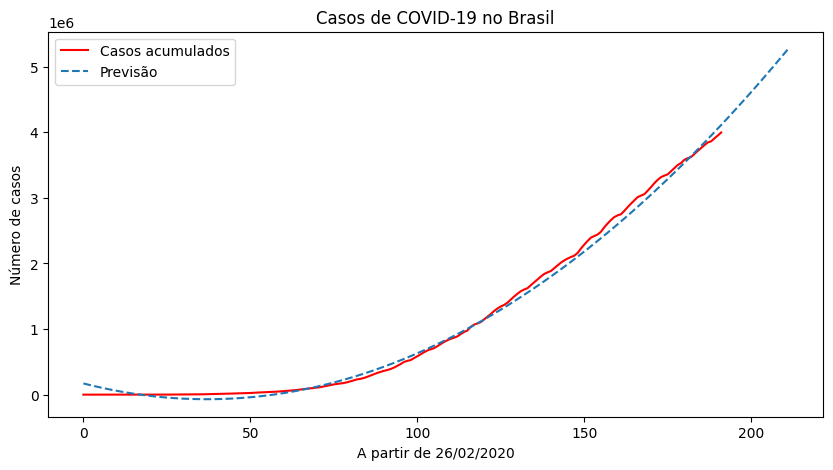

In [131]:
plt.subplots(figsize=(10,5))
plt.plot(forecast[:-20], y, color='red')
plt.plot(forecast, previsao_total, linestyle='dashed')
plt.title('Casos de COVID-19 no Brasil')
plt.xlabel('A partir de 26/02/2020')
plt.ylabel('Número de casos')
plt.legend(['Casos acumulados', 'Previsão']);

In [132]:
previsao_total[100]

np.float64(630441.7109794475)

**Métricas de Desempenho**

In [103]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Coeficiente de Determinação (R^2)
score

In [105]:
poly_teste_pred = regressor.predict(x_teste_poly)

In [ ]:
print('MAE:', mean_absolute_error(poly_teste_pred, y_teste))
print('MSE:', mean_squared_error(poly_teste_pred, y_teste))
print('RMSE:', np.sqrt(mean_squared_error(poly_teste_pred, y_teste)))